<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/08_voc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pascal VOC database

upgrade gdown

In [1]:
!pip install --upgrade gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-cp36-none-any.whl size=9694 sha256=25e6e8ef4cc80b6ec95ac9b0d89b15190f8b4bf1989b5e34376bae36ba65ca6f
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


google drive 마운트

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


google drive를 이용한 다운로드

In [4]:
import gdown
md5 = '6cd6e144f989b92b3379bac3b3de84fd'
url = 'https://drive.google.com/file/d/14eyB2lkxrG83fGy4t395sgZqADOYJ_yE/view?usp=sharing'
output = '/mydrive/VOCtrainval_11-May-2012.tar'
gdown.cached_download(url, output, md5=md5)

Computing MD5: /mydrive/VOCtrainval_11-May-2012.tar
MD5 matches: /mydrive/VOCtrainval_11-May-2012.tar


'/mydrive/VOCtrainval_11-May-2012.tar'

만일 google drive가 되지 않을 때에는 정식 repo 혹은 mirror repor로 부터 다운로드

In [5]:
# Pascal VOC 2012 trainval official
#!wget -c http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar -O /mydrive/VOCtrainval_11-May-2012.tar


# Pascal VOC 2012 trainval mirror from Joseph Redmon's site
#!wget -c http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar -O /mydrive/VOCtrainval_11-May-2012.tar

소스 코드 복사

In [15]:
!git clone https://github.com/shevious/keras-yolo4.git

Cloning into 'keras-yolo4'...
remote: Enumerating objects: 72, done.
remote: Total 72 (delta 0), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (72/72), done.


실행 폴더 이동

In [17]:
%cd keras-yolo4

/content/keras-yolo4


voc 2012 압축 해제

In [9]:
!tar xvf /mydrive/VOCtrainval_11-May-2012.tar

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/SegmentationClass/2008_002080.png
VOCdevkit/VOC2012/Segmentati

In [7]:
!ls VOCdevkit/VOC2012

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


In [10]:
!ln -s VOCdevkit data

In [12]:
!ls data

VOC2012


In [14]:
!cat 2012_train.txt

/content/data/VOC2012/JPEGImages/2008_000008.jpg 53,87,471,420,12 158,44,289,167,14
/content/data/VOC2012/JPEGImages/2008_000015.jpg 270,1,378,176,4 57,1,164,150,4
/content/data/VOC2012/JPEGImages/2008_000019.jpg 139,2,372,197,11 165,66,318,236,11 361,1,480,112,11
/content/data/VOC2012/JPEGImages/2008_000023.jpg 6,1,314,262,19 40,97,121,411,4 137,36,169,109,14 180,36,216,104,14 96,39,123,103,14
/content/data/VOC2012/JPEGImages/2008_000028.jpg 158,199,231,240,6 47,202,94,238,6
/content/data/VOC2012/JPEGImages/2008_000033.jpg 104,61,476,257,0
/content/data/VOC2012/JPEGImages/2008_000036.jpg 120,1,203,35,1 117,38,273,121,1 206,74,395,237,14 24,2,500,188,3 1,187,500,282,3
/content/data/VOC2012/JPEGImages/2008_000037.jpg 47,157,450,282,0
/content/data/VOC2012/JPEGImages/2008_000041.jpg 271,170,386,234,14 295,189,328,231,14 206,176,256,236,14 122,162,198,330,14 457,212,500,297,14 438,173,500,243,14 351,272,452,375,8 265,250,353,364,8 189,260,286,375,8 149,224,402,331,10 358,188,469,359,14
/c

In [11]:
import xml.etree.ElementTree as ET
from os import getcwd

#sets=[('2012', 'train'), ('2012', 'val'), ('2012', 'test')]
sets=[('2012', 'train'), ('2012', 'val')]
#sets=[('2007', 'train'), ('2007', 'val'), ('2007', 'test')]

classes = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]


def convert_annotation(year, image_id, list_file):
    in_file = open('data/VOC%s/Annotations/%s.xml'%(year, image_id))
    tree=ET.parse(in_file)
    root = tree.getroot()

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))

wd = getcwd()

for year, image_set in sets:
    image_ids = open('data/VOC%s/ImageSets/Main/%s.txt'%(year, image_set)).read().strip().split()
    list_file = open('%s_%s.txt'%(year, image_set), 'w')
    for image_id in image_ids:
        list_file.write('%s/data/VOC%s/JPEGImages/%s.jpg'%(wd, year, image_id))
        convert_annotation(year, image_id, list_file)
        list_file.write('\n')
    list_file.close()

In [20]:
!head -10 2012_train.txt

/home/kotech/workspace/keras-yolo4/data/VOC2012/JPEGImages/2008_000008.jpg 53,87,471,420,12 158,44,289,167,14
/home/kotech/workspace/keras-yolo4/data/VOC2012/JPEGImages/2008_000015.jpg 270,1,378,176,4 57,1,164,150,4
/home/kotech/workspace/keras-yolo4/data/VOC2012/JPEGImages/2008_000019.jpg 139,2,372,197,11 165,66,318,236,11 361,1,480,112,11
/home/kotech/workspace/keras-yolo4/data/VOC2012/JPEGImages/2008_000023.jpg 6,1,314,262,19 40,97,121,411,4 137,36,169,109,14 180,36,216,104,14 96,39,123,103,14
/home/kotech/workspace/keras-yolo4/data/VOC2012/JPEGImages/2008_000028.jpg 158,199,231,240,6 47,202,94,238,6
/home/kotech/workspace/keras-yolo4/data/VOC2012/JPEGImages/2008_000033.jpg 104,61,476,257,0
/home/kotech/workspace/keras-yolo4/data/VOC2012/JPEGImages/2008_000036.jpg 120,1,203,35,1 117,38,273,121,1 206,74,395,237,14 24,2,500,188,3 1,187,500,282,3
/home/kotech/workspace/keras-yolo4/data/VOC2012/JPEGImages/2008_000037.jpg 47,157,450,282,0
/home/kotech/workspace/keras-yolo4/data/VOC2012/J

# COCO dataset

coco 데이터셋 홈페이지:  
https://cocodataset.org/  
  
coco 데이터셋 다운로드 페이지:  
https://cocodataset.org/#download  

In [27]:
!wget -c 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'

--2020-11-07 09:33:19--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.38.212
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.38.212|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  89.7MB/s    in 2.7s    

2020-11-07 09:33:22 (89.7 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [32]:
!unzip annotations_trainval2017.zip -d mscoco2017

Archive:  annotations_trainval2017.zip
  inflating: mscoco2017/annotations/instances_train2017.json  
  inflating: mscoco2017/annotations/instances_val2017.json  
  inflating: mscoco2017/annotations/captions_train2017.json  
  inflating: mscoco2017/annotations/captions_val2017.json  
  inflating: mscoco2017/annotations/person_keypoints_train2017.json  
  inflating: mscoco2017/annotations/person_keypoints_val2017.json  


In [22]:
# COCO train data 다운로드 (약 18GB)
#!wget -c 'http://images.cocodataset.org/zips/train2017.zip' -O /mydrive/train2017.zip

--2020-11-07 09:23:56--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.105.108
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.105.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘/mydrive/train2017.zip’

/mydrive/train2017.   6%[>                   ]   1.19G  62.7MB/s    eta 4m 12s ^C


다운로드 2017 val 이미지

In [21]:
!wget -c 'http://images.cocodataset.org/zips/val2017.zip' -O /mydrive/val2017.zip

--2020-11-07 09:22:14--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.184.27
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.184.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘/mydrive/val2017.zip’

/mydrive/val2017.zi 100%[===================>] 777.80M  63.9MB/s    in 14s     

2020-11-07 09:22:28 (57.3 MB/s) - ‘/mydrive/val2017.zip’ saved [815585330/815585330]



In [33]:
!unzip /mydrive/val2017.zip -d mscoco2017

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: mscoco2017/val2017/000000231527.jpg  
 extracting: mscoco2017/val2017/000000578922.jpg  
 extracting: mscoco2017/val2017/000000062808.jpg  
 extracting: mscoco2017/val2017/000000119038.jpg  
 extracting: mscoco2017/val2017/000000114871.jpg  
 extracting: mscoco2017/val2017/000000463918.jpg  
 extracting: mscoco2017/val2017/000000365745.jpg  
 extracting: mscoco2017/val2017/000000320425.jpg  
 extracting: mscoco2017/val2017/000000481404.jpg  
 extracting: mscoco2017/val2017/000000314294.jpg  
 extracting: mscoco2017/val2017/000000335328.jpg  
 extracting: mscoco2017/val2017/000000513688.jpg  
 extracting: mscoco2017/val2017/000000158548.jpg  
 extracting: mscoco2017/val2017/000000132116.jpg  
 extracting: mscoco2017/val2017/000000415238.jpg  
 extracting: mscoco2017/val2017/000000321333.jpg  
 extracting: mscoco2017/val2017/000000081738.jpg  
 extracting: mscoco2017/val2017/000000577584.jpg  
 extracting: mscoco2017/val2017/000000346905.j

COCO annotation 만들기  
`coco_annotation.py`  

In [36]:
year = '2017'

# train 혹은 val 선택
#trainval = 'train'
trainval = 'val'
import json
from collections import defaultdict

name_box_id = defaultdict(list)
id_name = dict()
f = open(
    "mscoco2017/annotations/instances_%s2017.json" % trainval,
        encoding='utf-8')
data = json.load(f)

annotations = data['annotations']
for ant in annotations:
    id = ant['image_id']
    name = 'mscoco2017/%s2017/%012d.jpg' % (trainval, id)
    cat = ant['category_id']

    if cat >= 1 and cat <= 11:
        cat = cat - 1
    elif cat >= 13 and cat <= 25:
        cat = cat - 2
    elif cat >= 27 and cat <= 28:
        cat = cat - 3
    elif cat >= 31 and cat <= 44:
        cat = cat - 5
    elif cat >= 46 and cat <= 65:
        cat = cat - 6
    elif cat == 67:
        cat = cat - 7
    elif cat == 70:
        cat = cat - 9
    elif cat >= 72 and cat <= 82:
        cat = cat - 10
    elif cat >= 84 and cat <= 90:
        cat = cat - 11

    name_box_id[name].append([ant['bbox'], cat])

f = open('%s.txt' % trainval, 'w')
for key in name_box_id.keys():
    f.write(key)
    box_infos = name_box_id[key]
    for info in box_infos:
        x_min = int(info[0][0])
        y_min = int(info[0][1])
        x_max = x_min + int(info[0][2])
        y_max = y_min + int(info[0][3])

        box_info = " %d,%d,%d,%d,%d" % (
            x_min, y_min, x_max, y_max, int(info[1]))
        f.write(box_info)
    f.write('\n')
f.close()

In [19]:
%pycat convert.py

In [ ]:
!cat val.txt

In [41]:
import gdown
md5 = '00a4878d05f4d832ab38861b32061283'
url = 'https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT'
output = 'yolov4.weights'
#gdown.download(url, output, quiet=False)
gdown.cached_download(url, output, md5=md5)

Computing MD5: yolov4.weights
MD5 matches: yolov4.weights


'yolov4.weights'

# convert YOLOv4 weights to Keras h5

file_name: `conver.py`

In [42]:
import os
import colorsys

import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

from yolo4.model import yolo_eval, yolo4_body
from yolo4.utils import letterbox_image

from PIL import Image, ImageFont, ImageDraw
from timeit import default_timer as timer
import matplotlib.pyplot as plt

from operator import itemgetter

import tensorflow as tf

class Yolo4(object):
    def get_class(self):
        classes_path = os.path.expanduser(self.classes_path)
        with open(classes_path) as f:
            class_names = f.readlines()
        class_names = [c.strip() for c in class_names]
        return class_names

    def get_anchors(self):
        anchors_path = os.path.expanduser(self.anchors_path)
        with open(anchors_path) as f:
            anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        return np.array(anchors).reshape(-1, 2)

    def load_yolo(self):
        model_path = os.path.expanduser(self.model_path)
        assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

        self.class_names = self.get_class()
        self.anchors = self.get_anchors()

        num_anchors = len(self.anchors)
        num_classes = len(self.class_names)

        # Generate colors for drawing bounding boxes.
        hsv_tuples = [(x / len(self.class_names), 1., 1.)
                      for x in range(len(self.class_names))]
        self.colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
        self.colors = list(
            map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)),
                self.colors))

        #self.sess = K.get_session()

        # Load model, or construct model and load weights.
        self.yolo4_model = yolo4_body(Input(shape=(608, 608, 3)), num_anchors//3, num_classes)
        #print(self.yolo4_model.summary())
        #print('num_anchors =', num_anchors)
        #print('num_classes =', num_classes)

        # Read and convert darknet weight
        print('Loading weights.')
        weights_file = open(self.weights_path, 'rb')
        major, minor, revision = np.ndarray(
            shape=(3, ), dtype='int32', buffer=weights_file.read(12))
        if (major*10+minor)>=2 and major<1000 and minor<1000:
            seen = np.ndarray(shape=(1,), dtype='int64', buffer=weights_file.read(8))
        else:
            seen = np.ndarray(shape=(1,), dtype='int32', buffer=weights_file.read(4))
        print('Weights Header: ', major, minor, revision, seen)

        convs_to_load = []
        bns_to_load = []
        for i in range(len(self.yolo4_model.layers)):
            layer_name = self.yolo4_model.layers[i].name
            if layer_name == 'conv2d':
                convs_to_load.append((0, i))
            elif layer_name.startswith('conv2d_'):
                convs_to_load.append((int(layer_name[7:]), i))
            if layer_name == 'batch_normalization':
                bns_to_load.append((0, i))
            elif layer_name.startswith('batch_normalization_'):
                bns_to_load.append((int(layer_name[20:]), i))

        convs_sorted = sorted(convs_to_load, key=itemgetter(0))
        bns_sorted = sorted(bns_to_load, key=itemgetter(0))
        #print('bns_sorted = ', bns_sorted)

        bn_index = 0
        for i in range(len(convs_sorted)):
            print('Converting ', i)
            if i == 93 or i == 101 or i == 109:
                #no bn, with bias
                weights_shape = self.yolo4_model.layers[convs_sorted[i][1]].get_weights()[0].shape
                bias_shape = self.yolo4_model.layers[convs_sorted[i][1]].get_weights()[0].shape[3]
                filters = bias_shape
                size = weights_shape[0]
                darknet_w_shape = (filters, weights_shape[2], size, size)
                weights_size = np.product(weights_shape)

                conv_bias = np.ndarray(
                    shape=(filters, ),
                    dtype='float32',
                    buffer=weights_file.read(filters * 4))
                conv_weights = np.ndarray(
                    shape=darknet_w_shape,
                    dtype='float32',
                    buffer=weights_file.read(weights_size * 4))
                conv_weights = np.transpose(conv_weights, [2, 3, 1, 0])
                self.yolo4_model.layers[convs_sorted[i][1]].set_weights([conv_weights, conv_bias])
            else:
                #with bn, no bias
                weights_shape = self.yolo4_model.layers[convs_sorted[i][1]].get_weights()[0].shape
                size = weights_shape[0]
                bn_shape = self.yolo4_model.layers[bns_sorted[bn_index][1]].get_weights()[0].shape
                filters = bn_shape[0]
                '''
                print('##')
                print('i = ', i)
                print('bn_index = ', bn_index)
                print('convs_sorted[i][1] = ', convs_sorted[i][1])
                print('bns_sorted[bn_index][1] = ', bns_sorted[bn_index][1])
                print('bn_shape = ', bn_shape)
                print('w layer name = ', self.yolo4_model.layers[convs_sorted[i][1]].name)
                print('bn layer name = ', self.yolo4_model.layers[bns_sorted[bn_index][1]].name)
                '''
                darknet_w_shape = (filters, weights_shape[2], size, size)
                weights_size = np.product(weights_shape)

                conv_bias = np.ndarray(
                    shape=(filters, ),
                    dtype='float32',
                    buffer=weights_file.read(filters * 4))
                bn_weights = np.ndarray(
                    shape=(3, filters),
                    dtype='float32',
                    buffer=weights_file.read(filters * 12))

                bn_weight_list = [
                    bn_weights[0],  # scale gamma
                    conv_bias,  # shift beta
                    bn_weights[1],  # running mean
                    bn_weights[2]  # running var
                ]
                self.yolo4_model.layers[bns_sorted[bn_index][1]].set_weights(bn_weight_list)

                conv_weights = np.ndarray(
                    shape=darknet_w_shape,
                    dtype='float32',
                    buffer=weights_file.read(weights_size * 4))
                conv_weights = np.transpose(conv_weights, [2, 3, 1, 0])
                self.yolo4_model.layers[convs_sorted[i][1]].set_weights([conv_weights])

                bn_index += 1

        weights_file.close()

        self.yolo4_model.save(self.model_path)
        for i in range(len(self.yolo4_model.layers)):
            lens = len(self.yolo4_model.layers[i].get_weights())
            for j in range(lens):
              shape = self.yolo4_model.layers[i].get_weights()[j].shape
              print('i = ', i, 'shape = ', shape)


        if self.gpu_num>=2:
            self.yolo4_model = multi_gpu_model(self.yolo4_model, gpus=self.gpu_num)

        self.input_image_shape = K.placeholder(shape=(2, ))
        self.boxes, self.scores, self.classes = yolo_eval(self.yolo4_model.output, self.anchors,
                len(self.class_names), self.input_image_shape,
                score_threshold=self.score)

    def __init__(self, score, iou, anchors_path, classes_path, model_path, weights_path, gpu_num=1):
        self.score = score
        self.iou = iou
        self.anchors_path = anchors_path
        self.classes_path = classes_path
        self.weights_path = weights_path
        self.model_path = model_path
        self.gpu_num = gpu_num
        self.load_yolo()

    def close_session(self):
        self.sess.close()

if __name__ == '__main__':
    model_path = 'yolo4_weight.h5'
    anchors_path = 'model_data/yolo4_anchors.txt'
    classes_path = 'model_data/coco_classes.txt'
    weights_path = 'yolov4.weights'

    score = 0.5
    iou = 0.5

    model_image_size = (608, 608)

    yolo4_model = Yolo4(score, iou, anchors_path, classes_path, model_path, weights_path)

    #yolo4_model.close_session()

Loading weights.
Weights Header:  0 2 5 [32032000]
Converting  0
Converting  1
Converting  2
Converting  3
Converting  4
Converting  5
Converting  6
Converting  7
Converting  8
Converting  9
Converting  10
Converting  11
Converting  12
Converting  13
Converting  14
Converting  15
Converting  16
Converting  17
Converting  18
Converting  19
Converting  20
Converting  21
Converting  22
Converting  23
Converting  24
Converting  25
Converting  26
Converting  27
Converting  28
Converting  29
Converting  30
Converting  31
Converting  32
Converting  33
Converting  34
Converting  35
Converting  36
Converting  37
Converting  38
Converting  39
Converting  40
Converting  41
Converting  42
Converting  43
Converting  44
Converting  45
Converting  46
Converting  47
Converting  48
Converting  49
Converting  50
Converting  51
Converting  52
Converting  53
Converting  54
Converting  55
Converting  56
Converting  57
Converting  58
Converting  59
Converting  60
Converting  61
Converting  62
Converting  63

**YOLO v4 test with pretrained weights**

In [3]:
%cd /content/keras-yolo4
!wget -c 'https://github.com/kotech1/computervision/raw/master/img/dog.jpg'

/content/keras-yolo4
--2020-11-07 10:28:37--  https://github.com/kotech1/computervision/raw/master/img/dog.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kotech1/computervision/master/img/dog.jpg [following]
--2020-11-07 10:28:37--  https://raw.githubusercontent.com/kotech1/computervision/master/img/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



Please visit https://github.com/miemie2013/Keras-YOLOv4 for more complete model!
Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 608, 608, 3) 0                                            
__________________________________________________________________________________________________
conv2d_220 (Conv2D)             (None, 608, 608, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_214 (BatchN (None, 608, 608, 32) 128         conv2d_220[0][0]                 
__________________________________________________________________________________________________
mish_144 (Mish)                 (None, 608, 608, 32) 0           batch_normalization_214[0][0]    
_____

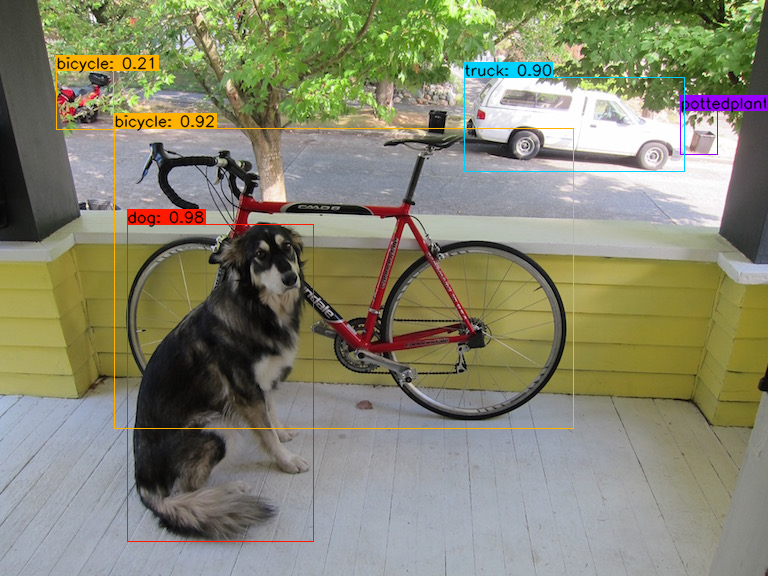

In [6]:
import os
import colorsys

import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

from yolo4.model import yolo_eval, yolo4_body
from yolo4.utils import letterbox_image

from PIL import Image, ImageFont, ImageDraw
from timeit import default_timer as timer
import cv2
from google.colab.patches import cv2_imshow

from decode_np import Decode


def get_class(classes_path):
    classes_path = os.path.expanduser(classes_path)
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    anchors_path = os.path.expanduser(anchors_path)
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)

if __name__ == '__main__':
    print('Please visit https://github.com/miemie2013/Keras-YOLOv4 for more complete model!')

    model_path = 'yolo4_weight.h5' # default pretrained weights
    #model_path = 'logs/000/'+'ep018-loss25.846.h5' # voc 2007 neck
    #model_path = 'logs/000/'+'ep046-loss6.901.h5' # raccoon neck
    #model_path = 'ep009-loss3.856.h5' # raccoon fine tuned
    #model_path = 'logs-fine/000/'+ 'ep028-loss3.622.h5' # voc 2012 fine
    anchors_path = 'model_data/yolo4_anchors.txt'
    #classes_path = 'model_data/voc_classes.txt'
    #classes_path = 'model_data/raccoon_classes.txt'
    classes_path = 'model_data/coco_classes.txt'

    class_names = get_class(classes_path)
    anchors = get_anchors(anchors_path)

    num_anchors = len(anchors)
    num_classes = len(class_names)

    model_image_size = (608, 608)

    # conf threshold and nms_iou threshold
    conf_thresh = 0.2
    nms_thresh = 0.45

    yolo4_model = yolo4_body(Input(shape=model_image_size+(3,)), num_anchors//3, num_classes)  
    yolo4_model.summary()
    #from tensorflow.keras.utils import plot_model
    #plot_model(yolo4_model, to_file='model.png')

    model_path = os.path.expanduser(model_path)
    assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

    yolo4_model.load_weights(model_path)

    _decode = Decode(conf_thresh, nms_thresh, model_image_size, yolo4_model, class_names)

    while True:
        #img = input('Input image filename:')
        try:
            image = cv2.imread('dog.jpg')
        except:
            print('Open Error! Try again!')
            continue
        else:
            image, boxes, scores, classes = _decode.detect_image(image, True)
            cv2_imshow(image)
            #cv2.imshow('image', image)
            #cv2.imwrite('output.jpg', image)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()
        break

    #yolo4_model.close_session()

In [16]:
!ls data/VOC2012/JPEGImages/ | tail +10 | head -10

2007_000123.jpg
2007_000129.jpg
2007_000170.jpg
2007_000175.jpg
2007_000187.jpg
2007_000241.jpg
2007_000243.jpg
2007_000250.jpg
2007_000256.jpg
2007_000272.jpg


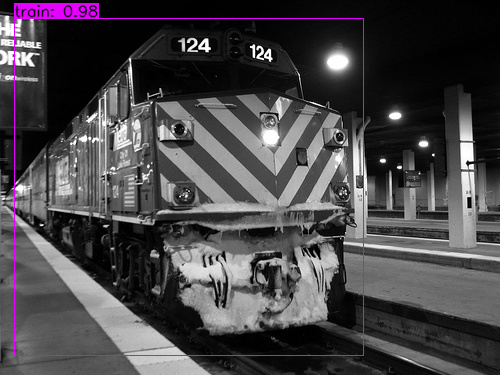

In [17]:
image = cv2.imread('data/VOC2012/JPEGImages/2007_000123.jpg')
image, boxes, scores, classes = _decode.detect_image(image, True)
cv2_imshow(image)